In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import io
Fraud_Train=pd.read_csv('drive/My Drive/Colab Notebooks/CreditCardFraud/credit_train.csv')
Fraud_Test=pd.read_csv('drive/My Drive/Colab Notebooks/CreditCardFraud/credit_test.csv')
Fraud_Train["Data"]="Train"
Fraud_Test["Data"]="Test"
fraud=pd.concat([Fraud_Train,Fraud_Test], sort=False)

In [21]:
fraud=fraud.reset_index(drop=True)
fraud.shape

(284807, 31)

In [22]:
fraud[fraud["Data"]=="Test"].shape

(56962, 31)

In [23]:
fraud.duplicated().sum()

7101

In [0]:
fraud.drop_duplicates(inplace=True)

In [25]:
fraud[fraud["Data"]=="Test"].shape

(56259, 31)

In [26]:
fraud["Class"].value_counts()

'0'    277230
'1'       476
Name: Class, dtype: int64

In [0]:
fraud["Class"]=fraud["Class"].apply(lambda x: 0 if x=="'0'" else 1)

In [28]:
fraud["Class"].value_counts()

0    277230
1       476
Name: Class, dtype: int64

In [29]:
fraud.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
Data       object
dtype: object

In [30]:
fraud.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Data      0
dtype: int64

In [31]:
fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000,277706.000000
mean,-0.029554,-0.001489,0.020827,-0.002778,-0.010011,-0.013453,0.006748,-0.004858,-0.009322,0.002300,-0.005724,-0.003688,0.000660,0.000761,-0.008561,-0.003353,0.000460,0.002925,0.000640,0.002659,0.001880,0.004552,-0.001494,-0.005706,-0.003855,-0.000131,0.001475,0.000695,90.082456,0.001714
std,1.954360,1.663922,1.508901,1.421973,1.377634,1.315205,1.239696,1.191002,1.100006,1.087573,1.020625,0.998951,0.998963,0.953629,0.917119,0.879244,0.845200,0.840867,0.818943,0.777849,0.732117,0.726076,0.630009,0.605298,0.523483,0.483786,0.401737,0.332077,252.478042,0.041366
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.936874,-0.610029,-0.852057,-0.859522,-0.698811,-0.766745,-0.552703,-0.209628,-0.655966,-0.538130,-0.771169,-0.411998,-0.653342,-0.425776,-0.593609,-0.475574,-0.482515,-0.498850,-0.462928,-0.211995,-0.225808,-0.534582,-0.164624,-0.359663,-0.322158,-0.328074,-0.071561,-0.052727,6.140000,0.000000
50%,-0.041122,0.069657,0.196684,-0.030019,-0.060230,-0.272534,0.043854,0.022482,-0.061404,-0.092165,-0.038284,0.135329,-0.011646,0.049876,0.038087,0.062734,-0.063837,0.000430,0.001734,-0.059149,-0.026539,0.012011,-0.013071,0.038140,0.011316,-0.055475,0.002302,0.011670,23.280000,0.000000
75%,1.297485,0.815974,1.043752,0.751625,0.603954,0.387290,0.580746,0.322079,0.594373,0.467122,0.736324,0.616124,0.667802,0.492325,0.640543,0.524449,0.400852,0.506194,0.464486,0.138287,0.188424,0.532833,0.146111,0.433631,0.347762,0.243540,0.093885,0.080771,79.207500,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


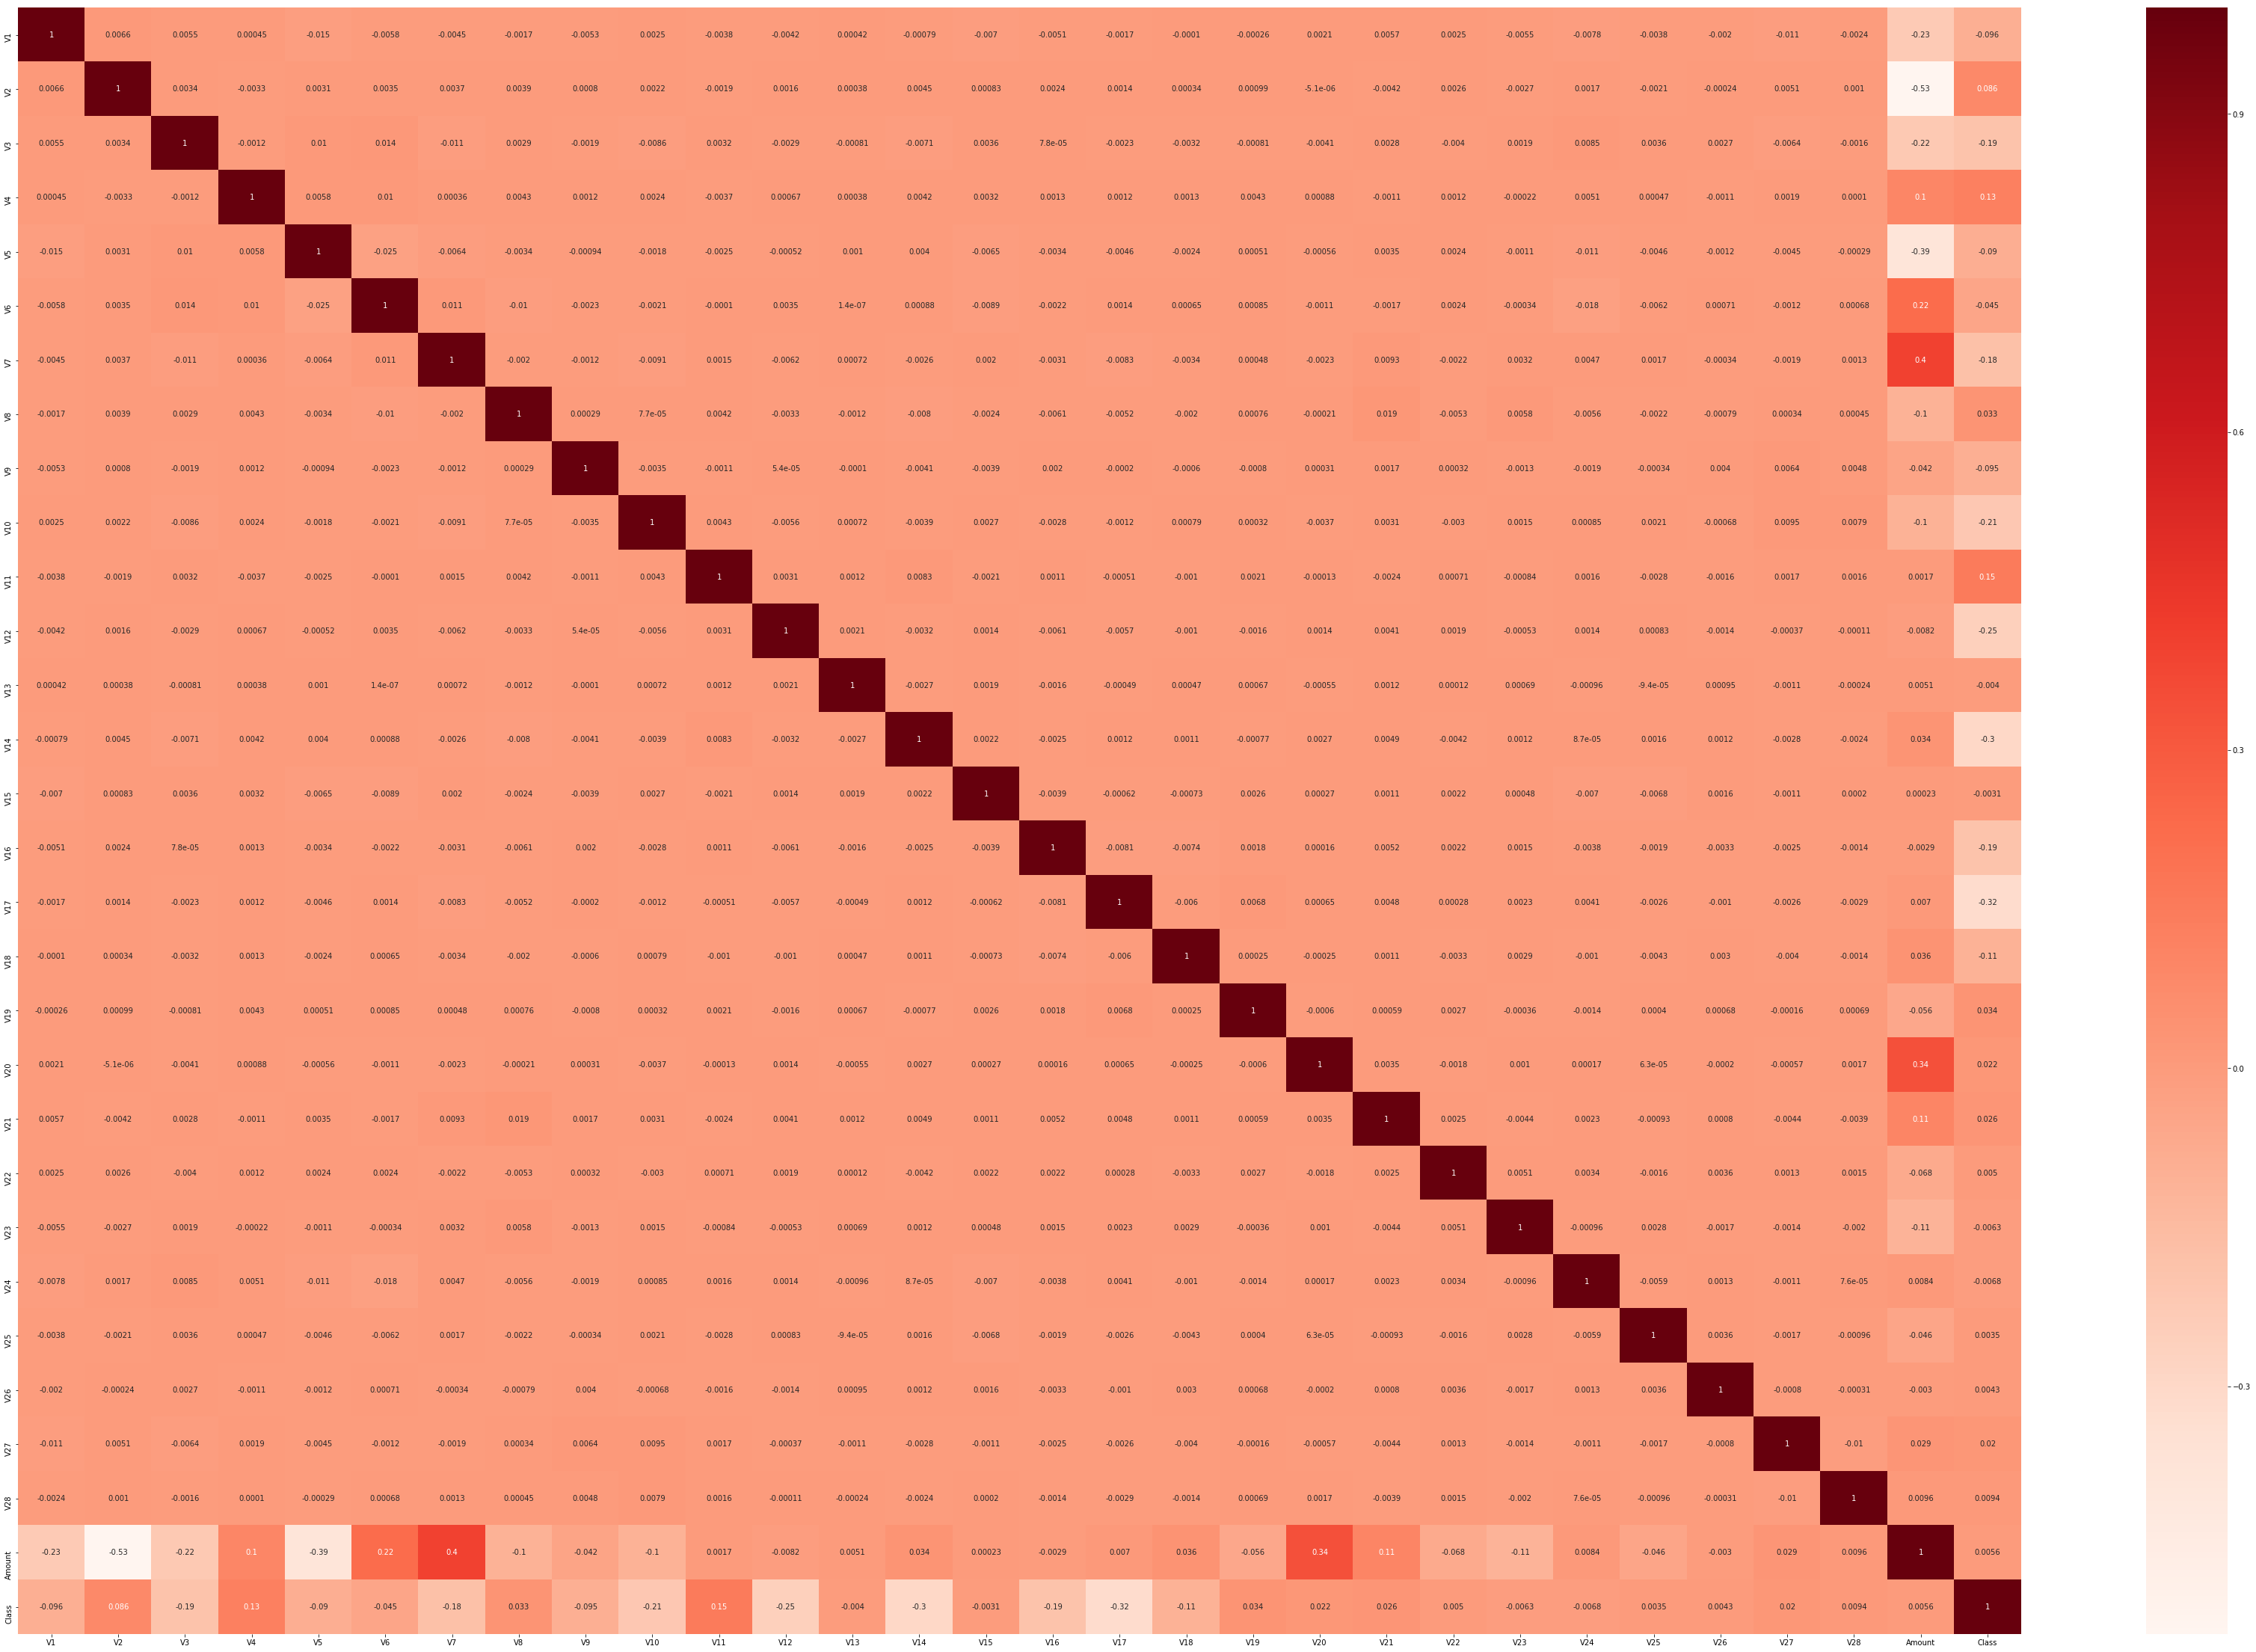

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(60,40))
cor1 = fraud.corr()
sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

In [0]:
fraud_train=fraud[fraud["Data"]=="Train"]
fraud_test=fraud[fraud["Data"]=="Test"]

In [0]:
del fraud_train["Data"]
del fraud_test["Data"]

In [0]:
x_train=fraud_train.drop("Class",axis=1)
y_train=fraud_train["Class"]

x_test=fraud_test.drop("Class",axis=1)
y_test=fraud_test["Class"]

In [0]:
x_train=preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float))
x_test=preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))

In [48]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
train_Pred = log_model.predict(x_train)
test_Pred = log_model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
confusion_matrix(y_train,train_Pred)

array([[221039,     31],
       [   136,    241]])

In [50]:
confusion_matrix(y_test,test_Pred)

array([[56143,    17],
       [   39,    60]])

In [0]:
from sklearn.metrics import accuracy_score, classification_report
def metrics(train, pred_train, test, pred_test):
  print("Train CM: \n", confusion_matrix(train, pred_train))
  print("Test CM: \n", confusion_matrix(test, pred_test))
  print("---------------------------------------------")
  print("Train accuracy score: ",accuracy_score(train, pred_train))
  print("Test accuracy score: ",accuracy_score(test, pred_test))
  print("---------------------------------------------")
  print("Train CR: \n",classification_report(train, pred_train))
  print("Test CR: \n",classification_report(test, pred_test))

In [65]:
metrics(y_train,train_Pred,y_test,test_Pred)

Train CM: 
 [[221039     31]
 [   136    241]]
Test CM: 
 [[56143    17]
 [   39    60]]
---------------------------------------------
Train accuracy score:  0.9992458692147557
Test accuracy score:  0.9990046037078512
---------------------------------------------
Train CR: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    221070
           1       0.89      0.64      0.74       377

    accuracy                           1.00    221447
   macro avg       0.94      0.82      0.87    221447
weighted avg       1.00      1.00      1.00    221447

Test CR: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.78      0.61      0.68        99

    accuracy                           1.00     56259
   macro avg       0.89      0.80      0.84     56259
weighted avg       1.00      1.00      1.00     56259



In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [67]:
dep = {}
for i in range(1, 25):
    print('Accuracy score using max_depth =', i, end = ': ')
    dt = DecisionTreeClassifier(max_depth=i,random_state = 45)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    dep[i]=accuracy_score(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
ma=max(dep, key=dep.get)
print(ma, dep[ma])

Accuracy score using max_depth = 1: 0.9989690538402745
Accuracy score using max_depth = 2: 0.9991112533105814
Accuracy score using max_depth = 3: 0.9991468031781582
Accuracy score using max_depth = 4: 0.9991290282443698
Accuracy score using max_depth = 5: 0.9992001279795233
Accuracy score using max_depth = 6: 0.9992001279795233
Accuracy score using max_depth = 7: 0.9992534527808884
Accuracy score using max_depth = 8: 0.9992356778471
Accuracy score using max_depth = 9: 0.9992534527808884
Accuracy score using max_depth = 10: 0.9992534527808884
Accuracy score using max_depth = 11: 0.9991645781119465
Accuracy score using max_depth = 12: 0.9990757034430047
Accuracy score using max_depth = 13: 0.9991290282443698
Accuracy score using max_depth = 14: 0.9990757034430047
Accuracy score using max_depth = 15: 0.9990757034430047
Accuracy score using max_depth = 16: 0.998951278906486
Accuracy score using max_depth = 17: 0.9990223786416396
Accuracy score using max_depth = 18: 0.999040153575428
Accura

In [68]:
dep = {}
for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max_features =', i, end = ': ')
    dt = DecisionTreeClassifier(max_depth=7,random_state = 45,max_features=i)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    dep[i]=accuracy_score(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
ma=max(dep, key=dep.get)
print(ma, dep[ma])

Accuracy score using max_features = 0.1: 0.9992356778471
Accuracy score using max_features = 0.2: 0.9993423274498302
Accuracy score using max_features = 0.30000000000000004: 0.9993601023836186
Accuracy score using max_features = 0.4: 0.9992712277146768
Accuracy score using max_features = 0.5: 0.9992179029133117
Accuracy score using max_features = 0.6: 0.9992179029133117
Accuracy score using max_features = 0.7000000000000001: 0.9992534527808884
Accuracy score using max_features = 0.8: 0.9993245525160419
Accuracy score using max_features = 0.9: 0.9992356778471
0.30000000000000004 0.9993601023836186


In [70]:
d = []
for i in ['entropy','gini']:
    print('Accuracy score using criterion =', i, end = ': ')
    dt = DecisionTreeClassifier(criterion=i,max_depth=7,random_state = 45,max_features=0.3)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    d.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
print('Max: ', max(d))

Accuracy score using criterion = entropy: 0.9992179029133117
Accuracy score using criterion = gini: 0.9993601023836186
Max:  0.9993601023836186


In [71]:
dep = {}
for i in range(2, 10):
    print('Accuracy score using min_samples_split =', i, end = ': ')
    dt = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state = 45,max_features=0.3,min_samples_split=i)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    dep[i]=accuracy_score(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
ma=max(dep, key=dep.get)
print(ma, dep[ma])

Accuracy score using min_samples_split = 2: 0.9993601023836186
Accuracy score using min_samples_split = 3: 0.9993601023836186
Accuracy score using min_samples_split = 4: 0.9993245525160419
Accuracy score using min_samples_split = 5: 0.9992890026484651
Accuracy score using min_samples_split = 6: 0.9992890026484651
Accuracy score using min_samples_split = 7: 0.9992890026484651
Accuracy score using min_samples_split = 8: 0.999377877317407
Accuracy score using min_samples_split = 9: 0.999377877317407
8 0.999377877317407


In [0]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state = 45,max_features=0.3,min_samples_split=8)
dt.fit(x_train, y_train)
train_dt = dt.predict(x_train)
test_dt = dt.predict(x_test)

In [73]:
metrics(y_train,train_dt,y_test,test_dt)

Train CM: 
 [[221065      5]
 [    69    308]]
Test CM: 
 [[56151     9]
 [   26    73]]
---------------------------------------------
Train accuracy score:  0.9996658342628258
Test accuracy score:  0.999377877317407
---------------------------------------------
Train CR: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    221070
           1       0.98      0.82      0.89       377

    accuracy                           1.00    221447
   macro avg       0.99      0.91      0.95    221447
weighted avg       1.00      1.00      1.00    221447

Test CR: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.89      0.74      0.81        99

    accuracy                           1.00     56259
   macro avg       0.94      0.87      0.90     56259
weighted avg       1.00      1.00      1.00     56259



In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
train_rf = rf.predict(x_train)
test_rf = rf.predict(x_test)

In [76]:
metrics(y_train,train_rf,y_test,test_rf)

Train CM: 
 [[221070      0]
 [     1    376]]
Test CM: 
 [[56153     7]
 [   21    78]]
---------------------------------------------
Train accuracy score:  0.999995484246795
Test accuracy score:  0.9995023018539256
---------------------------------------------
Train CR: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    221070
           1       1.00      1.00      1.00       377

    accuracy                           1.00    221447
   macro avg       1.00      1.00      1.00    221447
weighted avg       1.00      1.00      1.00    221447

Test CR: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56160
           1       0.92      0.79      0.85        99

    accuracy                           1.00     56259
   macro avg       0.96      0.89      0.92     56259
weighted avg       1.00      1.00      1.00     56259

